In [2]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:,0], 'X1':X[:,1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


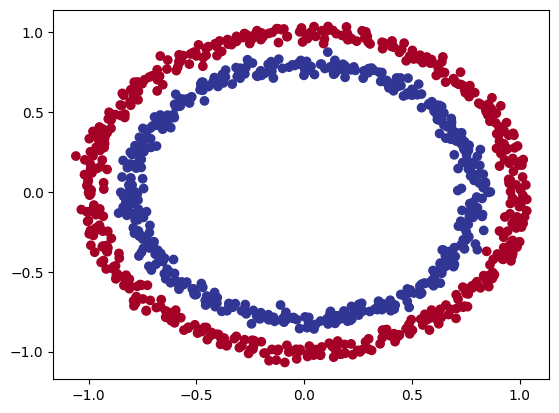

In [7]:
import matplotlib.pyplot as plt

plt.scatter(circles['X0'], circles['X1'], c=y, cmap=plt.cm.RdYlBu)

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [18]:
import tensorflow as tf

tf.random.set_seed(42)

model_new = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_new.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model_new.fit(X, y, epochs=50)

Epoch 1/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5060
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5040
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5000
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.5000
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.5030
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.5000
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6687 - accuracy: 0.7030
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.6820
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.7000
Epoch 10/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.6010
Epoch 11/50
32/32 [

In [25]:
import numpy as np
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max,100))
    
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    y_pred = model.predict(x_in)
    print(len(y_pred[0]))
    if len(y_pred[0]) > 1:
        print('doing multiclass classifi')
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('doing binary classifi')
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
1
doing binary classifi


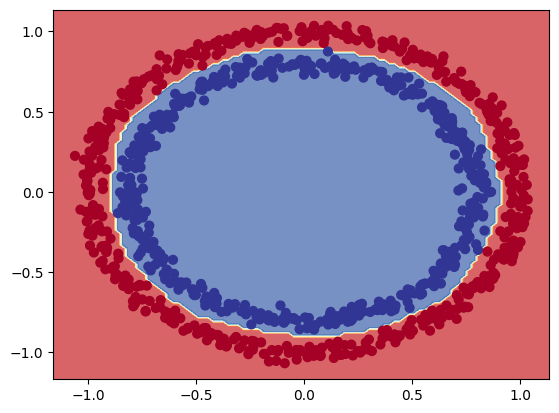

In [26]:
plot_decision_boundary(model_new, X, y)

In [27]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [28]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

sig_A = sigmoid(A)

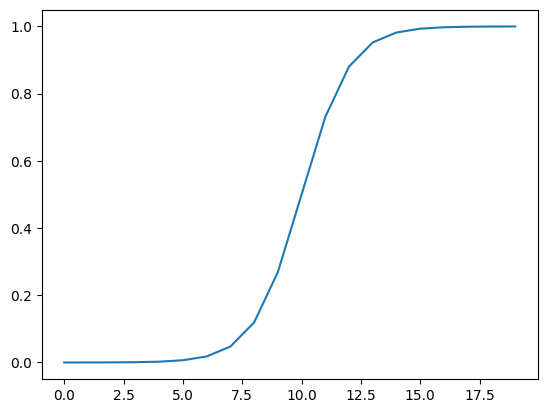

In [29]:
plt.plot(sig_A)

2024-06-16 23:35:34.034701: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-06-16 23:35:34.035469: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-06-16 23:35:34.035508: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-06-16 23:35:34.035548: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-06-16 23:35:34.035587: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-06-16

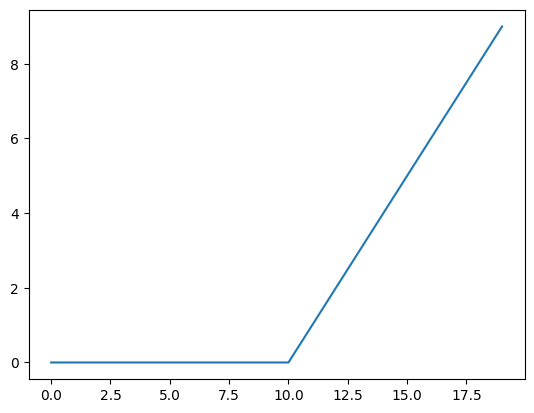

In [33]:
def relu(x):
    return tf.maximum(0,x)

plt.plot(relu(A))

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 

In [50]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model_8.fit(X_train, y_train, epochs=75)

Epoch 1/75
19/19 [==============================] - 1s 4ms/step - loss: 0.6965 - accuracy: 0.5050
Epoch 2/75
19/19 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 3/75
19/19 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.4917
Epoch 4/75
19/19 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.4967
Epoch 5/75
19/19 [==============================] - 0s 5ms/step - loss: 0.6846 - accuracy: 0.5167
Epoch 6/75
19/19 [==============================] - 0s 5ms/step - loss: 0.6822 - accuracy: 0.5367
Epoch 7/75
19/19 [==============================] - 0s 5ms/step - loss: 0.6801 - accuracy: 0.5567
Epoch 8/75
19/19 [==============================] - 0s 4ms/step - loss: 0.6779 - accuracy: 0.5567
Epoch 9/75
19/19 [==============================] - 0s 4ms/step - loss: 0.6755 - accuracy: 0.5683
Epoch 10/75
19/19 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.5733
Epoch 11/75
19/19 [

In [44]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.9900


[0.423135370016098, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
1
doing binary classifi
313/313 [==============================] - 1s 2ms/step
1
doing binary classifi


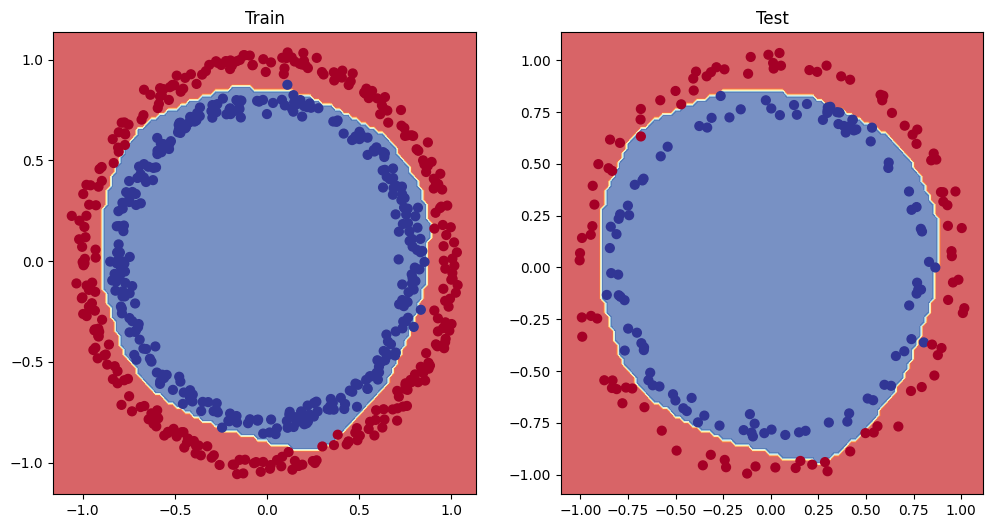

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)

<Axes: >

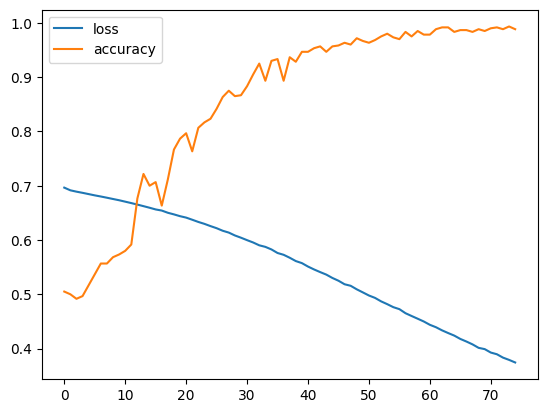

In [51]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [53]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4983 - lr: 1.0000e-04
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.4967 - lr: 1.1220e-04
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.4883 - lr: 1.2589e-04
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.4867 - lr: 1.4125e-04
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.4900 - lr: 1.5849e-04
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.4917 - lr: 1.7783e-04
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.4817 - lr: 1.9953e-04
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.4983 - lr: 2.2387e-04
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss:

<Axes: >

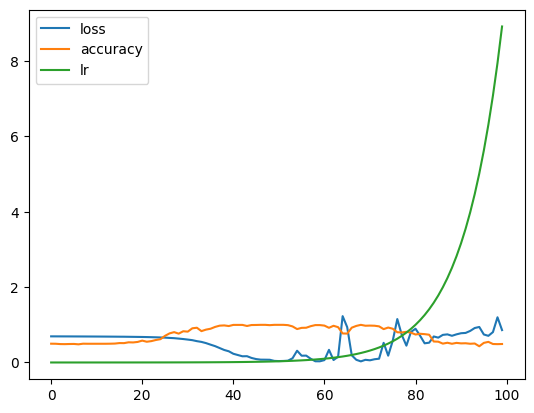

In [54]:
pd.DataFrame(history_9.history).plot()

Text(0, 0.5, 'Loss')

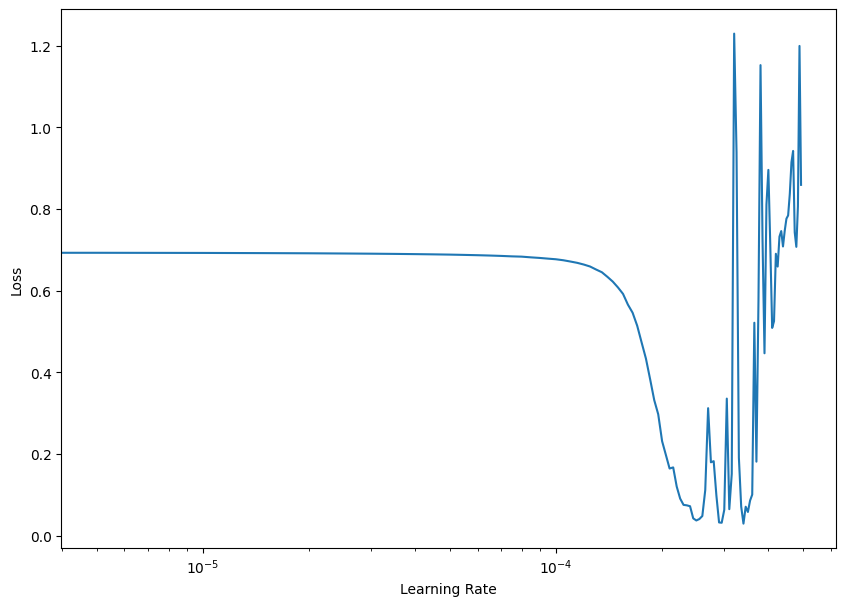

In [56]:
lrs = 1e-4 * (tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

In [82]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=0.002),
                 metrics=['accuracy'])

history_10 = model_10.fit(X_train, y_train, epochs=100)

Epoch 1/100
19/19 [==============================] - 1s 4ms/step - loss: 0.6878 - accuracy: 0.4967
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.4967
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.4983
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6810 - accuracy: 0.5400
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.5600
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5617
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.5850
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.6017
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6686 - accuracy: 0.6383
Epoch 10/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.6533
Epoch 11/

In [83]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.9950


[0.28748220205307007, 0.9950000047683716]

In [84]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.9750


[0.41630393266677856, 0.9750000238418579]

313/313 [==============================] - 0s 1ms/step
1
doing binary classifi
313/313 [==============================] - 0s 1ms/step
1
doing binary classifi


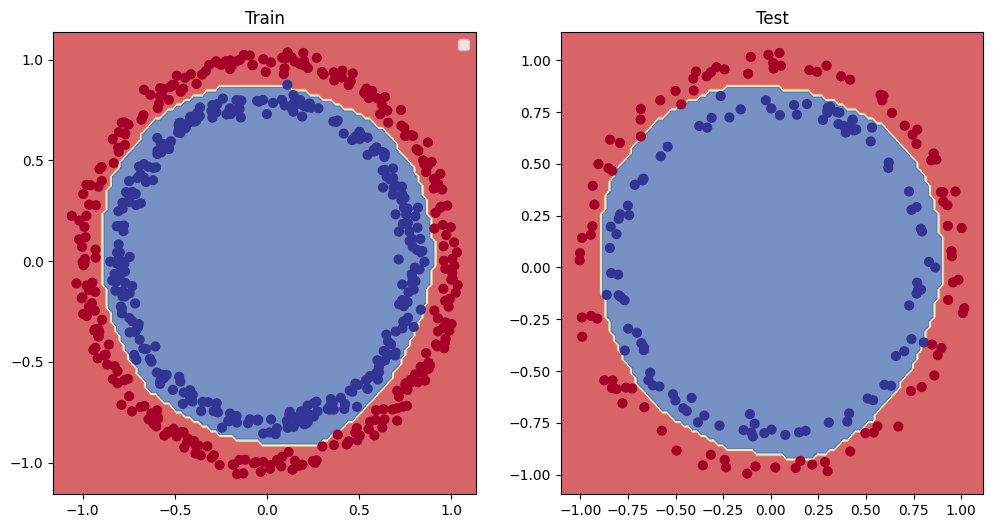

In [85]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.legend()
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)

In [86]:
loss, accuracy = model_10.evaluate(X_test, y_test)

print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.2875 - accuracy: 0.9950
Model loss on the test set: 0.28748220205307007
Model accuracy on the test set: 99.50%


In [92]:
from sklearn.metrics import confusion_matrix

y_pred = model_10.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [93]:
y_pred_binary = tf.round(y_pred)
confusion_matrix(y_test, y_pred_binary)

array([[100,   0],
       [  1,  99]])

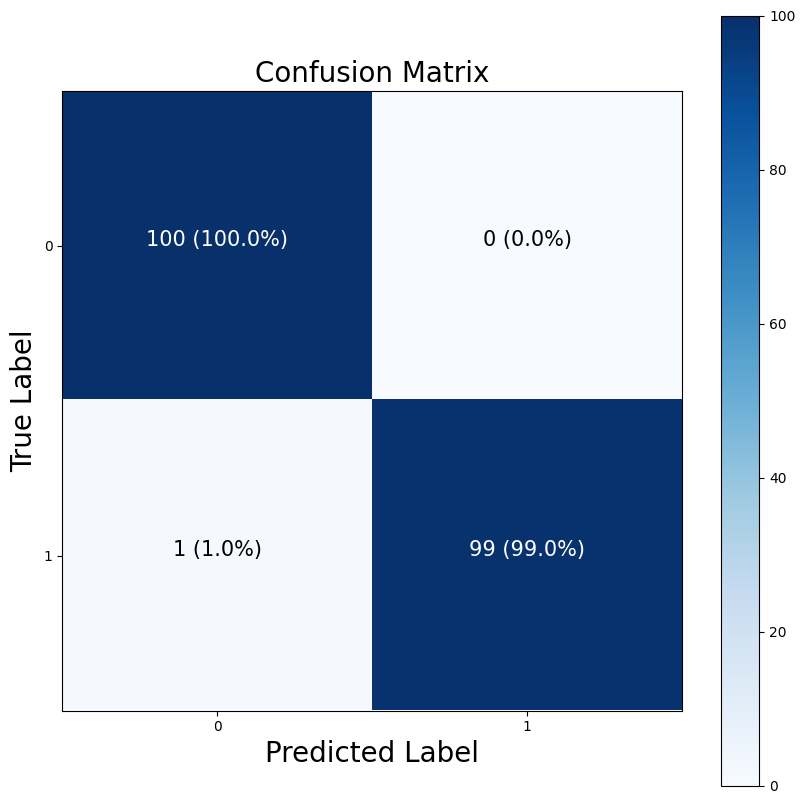

In [95]:
import itertools

figsize = (10,10)
cm = confusion_matrix(y_test,y_pred_binary)
cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]

fig,ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()\

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
             horizontalalignment='center',
             color='white' if cm[i,j] > threshold else 'black',
             size=15)



Multiclass classification

In [96]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [98]:
print(f'Training sample: \n{train_data[0]}\n')
print(f'Training label: \n{train_labels[0]}\n')

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [99]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

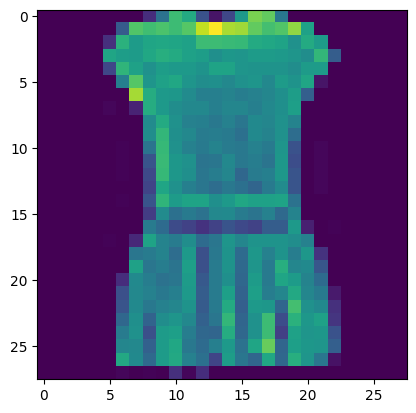

In [101]:
plt.imshow(train_data[3]);

In [102]:
class_names = ['tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'trouser')

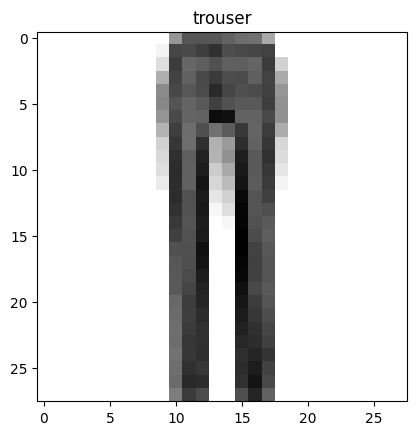

In [103]:
plt.imshow(train_data[69], cmap=plt.cm.binary)
plt.title(class_names[train_labels[69]])

In [106]:
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [109]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.9975 - accuracy: 0.2398 - val_loss: 1.5411 - val_accuracy: 0.3527
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4537 - accuracy: 0.3924 - val_loss: 1.4117 - val_accuracy: 0.3753
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3405 - accuracy: 0.4353 - val_loss: 1.2770 - val_accuracy: 0.4581
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2652 - accuracy: 0.4809 - val_loss: 1.1876 - val_accuracy: 0.5414
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1310 - accuracy: 0.5461 - val_loss: 1.0845 - val_accuracy: 0.5799
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0298 - accuracy: 0.5864 - val_loss: 1.0606 - val_accuracy: 0.6028
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9630 - accuracy: 0.6165 - val_loss: 0.9582 - val_accuracy:

In [110]:
model_11.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 4)                 3140      
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [112]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2469 - accuracy: 0.5365 - val_loss: 0.8351 - val_accuracy: 0.6954
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7167 - accuracy: 0.7609 - val_loss: 0.6695 - val_accuracy: 0.7745
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6284 - accuracy: 0.7865 - val_loss: 0.6311 - val_accuracy: 0.7833
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5975 - accuracy: 0.7940 - val_loss: 0.6070 - val_accuracy: 0.7922
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5788 - accuracy: 0.7987 - val_loss: 0.6044 - val_accuracy: 0.7934
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5673 - accuracy: 0.8030 - val_loss: 0.6084 - val_accuracy: 0.7910
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5578 - accuracy: 0.8061 - val_loss: 0.6004 - val_accuracy:

<Axes: title={'center': 'normalized'}>

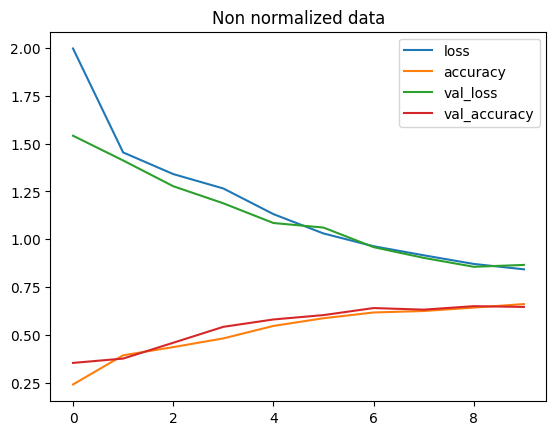

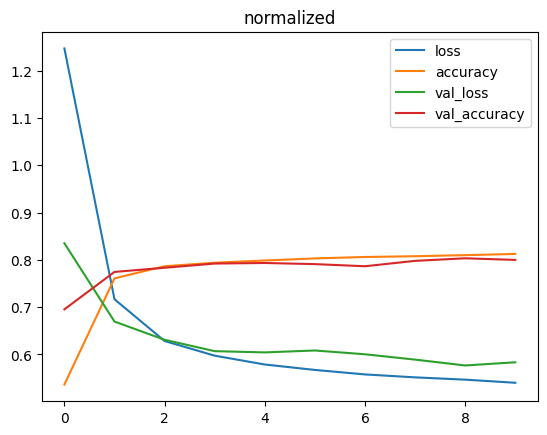

In [113]:
pd.DataFrame(non_norm_history.history).plot(title='Non normalized data')
pd.DataFrame(norm_history.history).plot(title='normalized')

In [114]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_kr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5913 - accuracy: 0.3743 - val_loss: 1.3132 - val_accuracy: 0.4525 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0655 - accuracy: 0.5605 - val_loss: 0.9556 - val_accuracy: 0.6016 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8906 - accuracy: 0.6458 - val_loss: 0.8178 - val_accuracy: 0.7183 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7505 - accuracy: 0.7421 - val_loss: 0.7257 - val_accuracy: 0.7599 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6913 - accuracy: 0.7638 - val_loss: 0.6981 - val_accuracy: 0.7628 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6674 - accuracy: 0.7692 - val_loss: 0.6919 - val_accuracy: 0.7585 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

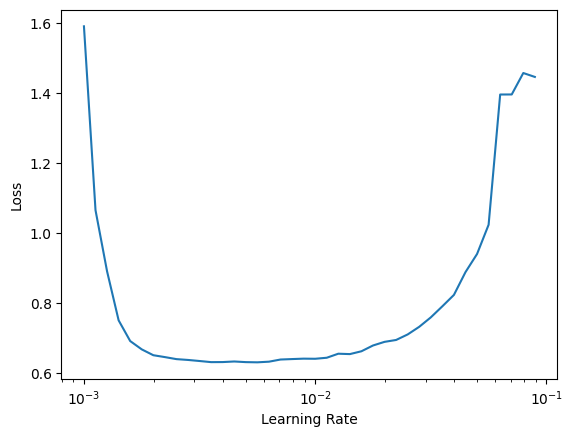

In [117]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_kr_history.history['loss']);
plt.xlabel('Learning Rate');
plt.ylabel('Loss');

In [124]:
def confusion(y_true, y_pred, classes=None, figsize=(20,20), text_size=15):
    cm = confusion_matrix(y_true,y_pred)
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    n_classes = cm.shape[0]

    fig,ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()\

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
                horizontalalignment='center',
                color='white' if cm[i,j] > threshold else 'black',
                size=text_size)

In [120]:
y_probs = model_12.predict(test_data_norm)

313/313 [==============================] - 0s 2ms/step


In [121]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 6, 6, 5, 7])

In [122]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

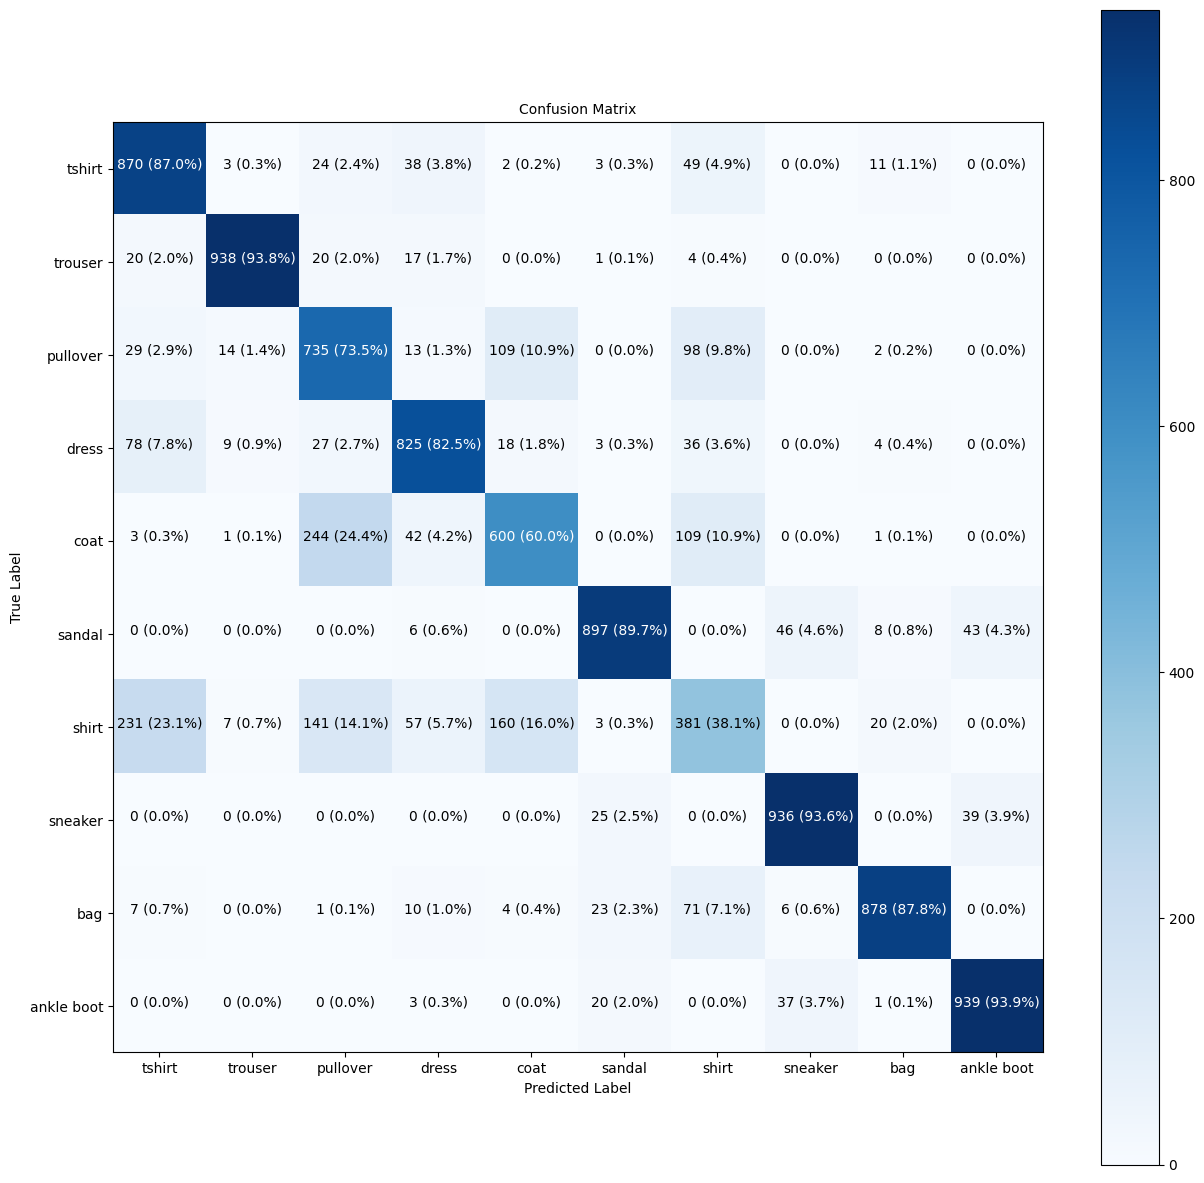

In [129]:
confusion(test_labels, 
          y_preds,
          classes=class_names,
          figsize=(15,15),
          text_size=10)

In [130]:
import random

def plot_random_image(model, images, true_labels, classes):
    i = random.randint(0, len(images))

    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target_image, cmap=plt.cm.binary)

    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel(f'Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})',
               color=color)

1/1 [==============================] - 0s 15ms/step


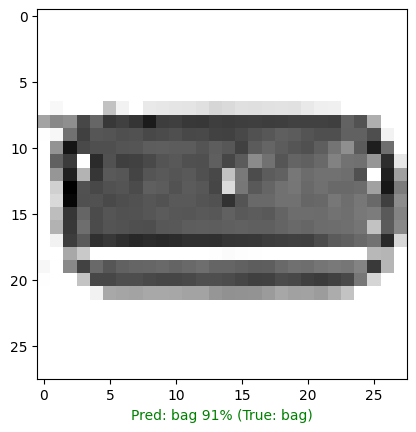

In [168]:
plot_random_image(model=model_12,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

In [170]:
model_12.layers

In [171]:
model_12.layers[2]

In [172]:
weights, biases = model_12.layers[1].get_weights()

weights, weights.shape

(array([[-0.03465411,  0.15089597,  0.17437136,  0.07494928],
        [-0.60686356,  0.63051426,  0.31576192,  0.4612717 ],
        [-0.60497314,  0.6577815 ,  0.4049808 ,  0.5149639 ],
        ...,
        [-0.06875432,  0.38845333,  0.5872193 , -0.06071898],
        [-0.10138445,  0.57036024,  0.22343403,  0.12558562],
        [-0.30897465,  0.3685733 ,  0.1252315 , -0.1041334 ]],
       dtype=float32),
 (784, 4))

In [174]:
biases, biases.shape

(array([ 1.6023047 ,  0.65299773,  0.41198295, -0.24285781], dtype=float32),
 (4,))

In [177]:
from tensorflow.keras.utils import plot_model

plot_model(model_12, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [184]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler

X,y = make_moons(n_samples=50000, noise=0.3, random_state=42)

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.2, random_state=42)

In [182]:
X_train.shape, X_test.shape

((40000, 2), (10000, 2))

In [186]:
y_train[:20]

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [188]:
tf.random.set_seed(42)

moon_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

moon_model.compile(loss='binary_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

moon_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1250/1250 [==============================] - 5s 3ms/step - loss: 0.4758 - accuracy: 0.8046
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3378 - accuracy: 0.8465
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3341 - accuracy: 0.8497
Epoch 4/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3331 - accuracy: 0.8507
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3333 - accuracy: 0.8501
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3330 - accuracy: 0.8500
Epoch 7/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3333 - accuracy: 0.8513
Epoch 8/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3329 - accuracy: 0.8506
Epoch 9/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3330 - accuracy: 0.8505
Epoch 10/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.332

313/313 [==============================] - 0s 2ms/step


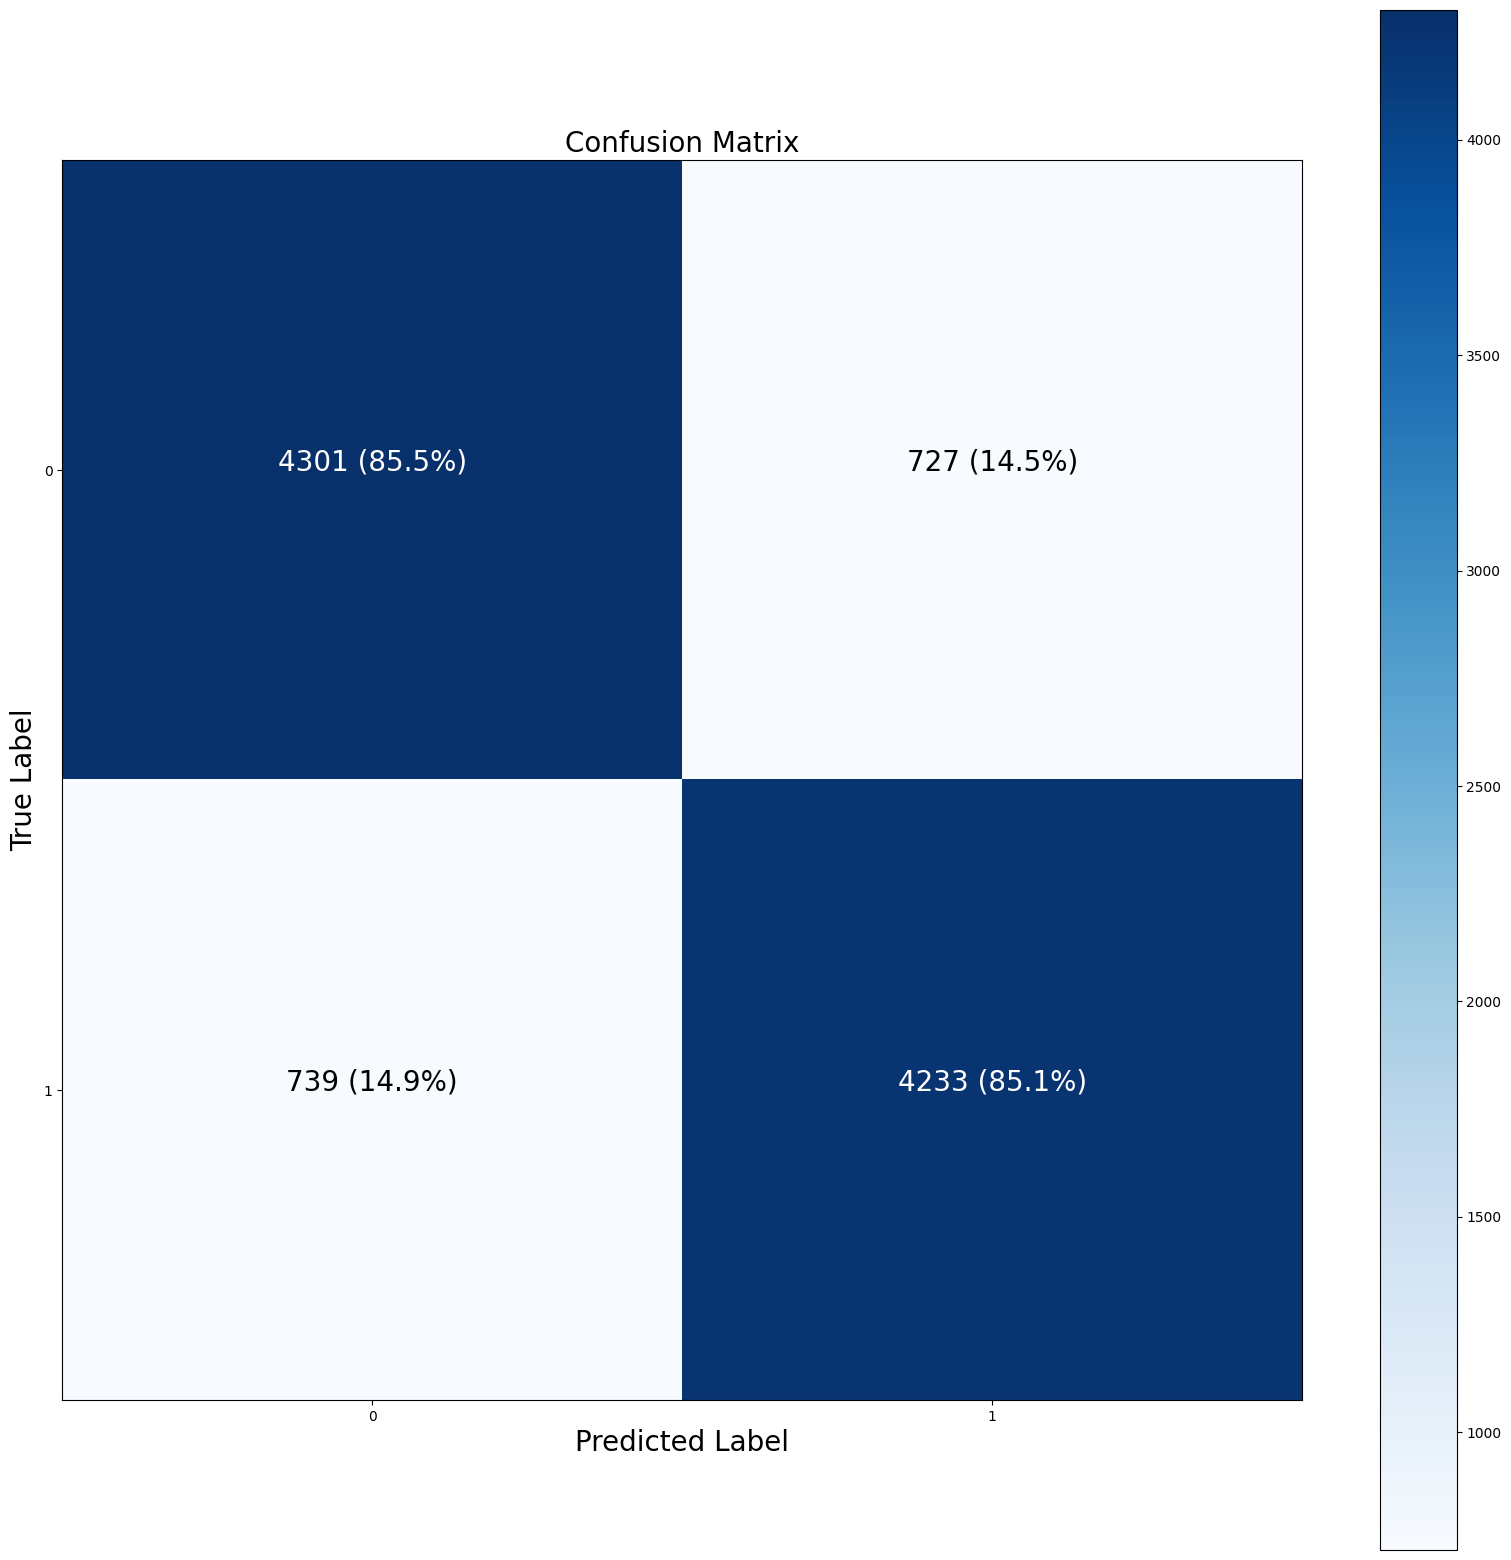

In [194]:
y_probs = moon_model.predict(X_test)
y_preds = tf.round(y_probs)

confusion(y_test,y_preds, text_size=20)